# Section 4 Project

1. 관심 데이터 선정 
*   Facebook Political Page from CrowdTangle
*   Posts from Democratic/Liberal and Republican/Conservative pages
*   Q: Political leanings can be predicted by language?
*   If so, would NLP with deep learning perform well (compared to ML methods)?

2. 데이터 선정 이유
*   Partisan language (or language differences in political party) is an interesting area in research
*   Other research examines official document (e.g. Congress records) or social media (e.g. Twitter) to distinguish partisan language with various approaches (count-based, word2vec, word-embedding, BERT ect).
*   Hard to validate (or generalize)
*   Unique dataset of Facebook posts

3. 가설 수립
*   Because everyday language can reflect one's political leanings and one's leanings can work as hidden (or latent) layers to represent their language use. 
*   BERT (with pre-trained LM) model will perform better than other methods such as LSTM or classical ML.

** text area (image below)
Message, Link.Text, Description (not shown), Image.Text

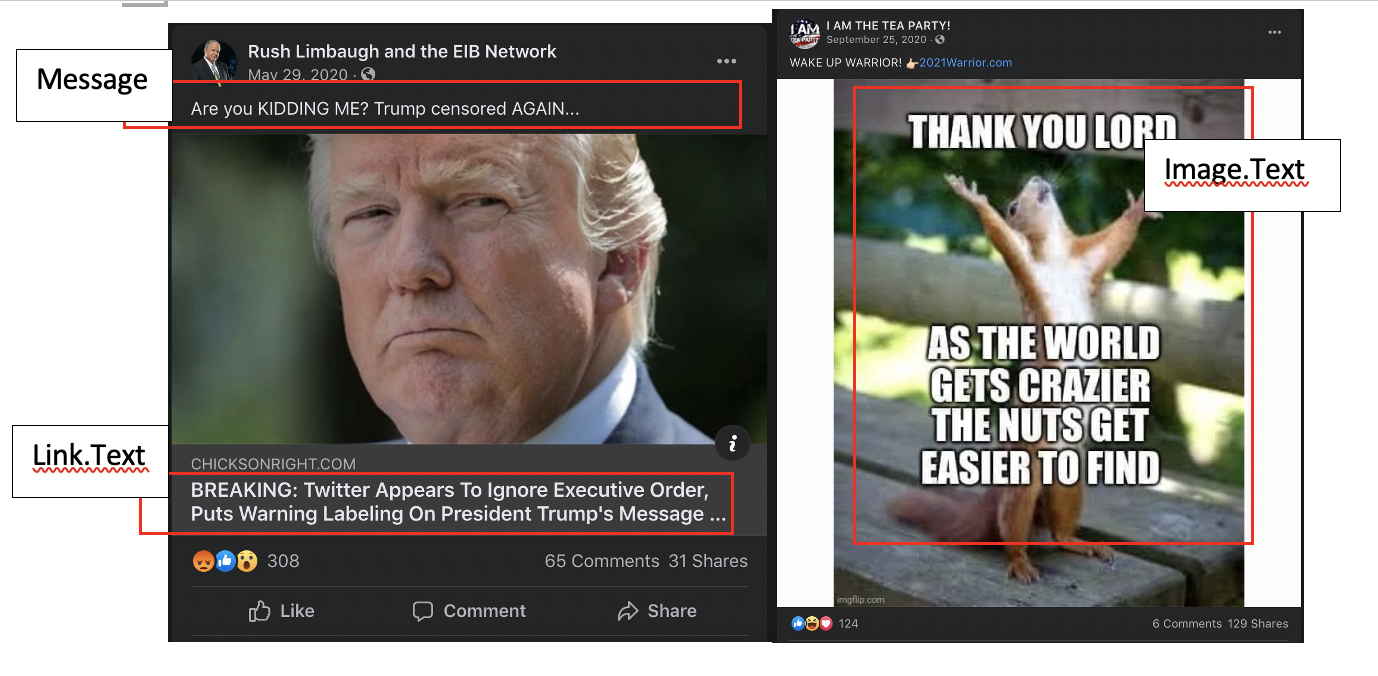

# Global setting (data prep)

## Load dataset

In [1]:
from google.colab import drive

drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [2]:
%cd drive/'MyDrive'/Codestates/data

/content/drive/MyDrive/Codestates/data


### data loading pre-processing

In [3]:
!pip install pyreadr

     |████████████████████████████████| 409 kB 5.1 MB/s 


In [4]:
# read data; 

dem_page = 'final_dem_pages_text_only.rds'
rep_page = 'final_rep_pages_text_only.rds'


In [5]:
import pyreadr

dem_page = pyreadr.read_r(dem_page) # note that it takes long due to the size
print(dem_page.keys()) 


odict_keys([None])


In [6]:
dem_page = dem_page[None]

In [7]:
dem_page.sample(3)

,text,leanings
2928326,Truth Matters. What he is saying is the peopl...,-1.0
5400935,"[via fb.me/Michael Sidky Ph D] ""IF YOUR KIDS...",-1.0
3234930,Every time you watch the show you are filling ...,-1.0


In [8]:
subset = dem_page[["text", "leanings"]]

In [9]:
subset.drop_duplicates().shape[0]

5731733

In [10]:
dem_page.shape[0]-subset.drop_duplicates().shape[0] # approximate num of duplicates

1078291

In [11]:
dem_page_sub = subset.drop_duplicates()

In [12]:
dem_page_sub['leanings'].value_counts()

-1.0    5731733
Name: leanings, dtype: int64

In [13]:

rep_page = pyreadr.read_r(rep_page) 
print(rep_page.keys()) 


odict_keys([None])


In [14]:
rep_page = rep_page[None]

In [15]:
rep_page.sample(3)

,text,leanings
3046353,Occupy Democrats Logic Chris Hayes @chrislha...,1.0
1054421,Unhinged and desperate! Alec Baldwin to Trump ...,1.0
6100553,So now we've officially got physical evidence ...,1.0


In [16]:
subset = rep_page[["text", "leanings"]]

In [17]:
subset.drop_duplicates().shape[0]

4777581

In [18]:
rep_page.shape[0]-subset.drop_duplicates().shape[0] # approximate num of duplicates

2573057

In [19]:
rep_page_sub = subset.drop_duplicates()

In [20]:
rep_page_sub['leanings'].value_counts()

1.0    4777581
Name: leanings, dtype: int64

In [21]:
import pandas as pd

pages =  pd.concat([dem_page_sub, rep_page_sub])

In [22]:
# shuffle

pages = pages.sample(frac=1).reset_index(drop=True)


In [23]:
pages.dtypes

text         object
leanings    float64
dtype: object

In [24]:
pages['leanings'].value_counts()

-1.0    5731733
 1.0    4777581
Name: leanings, dtype: int64

In [25]:
pages.to_pickle("final_pages.pkl")

In [ ]:
# read pickle file as dataframe
import pandas as pd

final_pages = pd.read_pickle('final_pages.pkl')


In [5]:
final_pages_10p = final_pages.sample(frac=0.1)
final_pages_10p.to_pickle("final_pages_10p.pkl")

## Load final dataset (as pickle)

In [3]:
# read pickle file as dataframe
import pandas as pd

final_pages = pd.read_pickle('final_pages_10p.pkl')

# display the dataframe
print(final_pages)

                                                      text  leanings
2408744   Jemele Hill Stands By Suggestion NASCAR Is Fo...       1.0
3138791  I joined KCRW “Left, Right, and Center” progra...      -1.0
5351312   Fox News Coming Up: A conversation with Reinc...       1.0
5909005  Jesse is right! JESSE WATTERS: GOP Can’t Drain...       1.0
2957262  BREAKING: Someone Just LEAKED PROOF HILLARY KN...       1.0
...                                                    ...       ...
1872362  No Amnesty; Build the Wall This is a re-share ...       1.0
5770875  Credit Slyngstad Cartoons   Slyngstad ©Zo19 WA...      -1.0
1599725   Trump Supporters Must Waive Right to Sue Over...      -1.0
8506047  Truly deplorable. Follow Occupy Democrats for ...      -1.0
5397109   GPUS National Black Caucus Juneteenth Schedul...      -1.0

[1050931 rows x 2 columns]


In [4]:
# use only 10%, -1 as liberal, 1 as conservative
final_pages['leanings'].value_counts()

-1.0    573194
 1.0    477737
Name: leanings, dtype: int64

In [5]:
import numpy as np

final_pages['leanings'] = np.where(final_pages['leanings'] == -1, 0, 1) # 0 as liberal, 1 as conservative

In [6]:
final_pages['leanings'].value_counts()

0    573194
1    477737
Name: leanings, dtype: int64

In [7]:
final_pages['text'] = final_pages['text'].astype(str)


In [8]:
final_pages.dtypes

text        object
leanings     int64
dtype: object

In [9]:
final_pages.sample(3)

,text,leanings
3650733,The Liberty Eagle Separated At Birth?,1
5603775,Jeremy Diamond @JDiamond1 @realDonaldTrump ...,0
234793,BY REBECCA SAVRANSKY A majority of voters in a...,0


In [85]:
#final_pages = final_pages.sample(frac=0.1)
#final_pages['leanings'].value_counts()

## Split dataset

In [10]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(final_pages, test_size=0.2, random_state=1) # 8:2

# target = 'leanings'
# features = final_pages.drop(columns=[target]).columns


In [11]:
# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(train.shape[0]))
print('Number of testing sentences: {:,}\n'.format(test.shape[0]))

Number of training sentences: 840,744

Number of testing sentences: 210,187



In [96]:
train[:10] #

,text,leanings
3228338,Priest suspended for condemning Black Lives M...,1
9052065,Via The Daily Caller Biden Loses All Control o...,1
4800588,Feds Seize Nearly $2 Million in Meth at Texas-...,1
7687721,After months of denying any wrongdoing... Lori...,1
5548548,Joe Biden worried in 1977 that certain de-seg...,0
4144548,"“In a sense, we’ve managed to push white natio...",0
9226098,MR. STOP & FRISK,1
4510910,"""The Washington Navy Yard gunman who killed 12...",1
8333372,Senator Schumer is now leading the charge for ...,0
1282834,WTF is wrong with these people? Oklahoma gove...,0


# LSTM 


## Setting up

In [181]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# from nltk.corpus import stopwords
# STOPWORDS = set(stopwords.words('english'))

print(tf.__version__)

vocab_size = 20000
embedding_dim = 64
max_length = 245
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

# max_features = 20000
# maxlen = 245
# batch_size = 32


2.6.0


In [182]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(train, test_size=0.1, random_state=1) # 9:1

# target = 'leanings'
# features = final_pages.drop(columns=[target]).columns


In [183]:

X_train = train.text.values
y_train = train.leanings.values

X_val = val.text.values
y_val = val.leanings.values

X_test = test.text.values
y_test = test.leanings.values

print(len(X_train), 'train sequences')
print(len(X_val), 'val sequences')
print(len(X_test), 'test sequences')

756669 train sequences
84075 val sequences
210187 test sequences


In [184]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'a': 5,
 'and': 6,
 'for': 9,
 'in': 7,
 'is': 8,
 'of': 4,
 'that': 10,
 'the': 2,
 'to': 3}

In [185]:
train_sequences = tokenizer.texts_to_sequences(X_train)
print(train_sequences[10])
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


[415, 1177, 14, 2, 575, 16933, 141, 113]


In [186]:
validation_sequences = tokenizer.texts_to_sequences(X_val)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

84075
(84075, 245)


In [187]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          1280000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 1,354,369
Trainable params: 1,354,369
Non-trainable params: 0
_________________________________________________________________


In [188]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
num_epochs = 10
history = model.fit(train_padded, y_train, epochs=num_epochs, validation_data=(validation_padded, y_val), verbose=2)

Epoch 1/10
23646/23646 - 484s - loss: 0.4234 - accuracy: 0.7954 - val_loss: 0.3779 - val_accuracy: 0.8211
Epoch 2/10
23646/23646 - 482s - loss: 0.3445 - accuracy: 0.8408 - val_loss: 0.3498 - val_accuracy: 0.8375
Epoch 3/10
23646/23646 - 485s - loss: 0.2955 - accuracy: 0.8682 - val_loss: 0.3486 - val_accuracy: 0.8396
Epoch 4/10
23646/23646 - 484s - loss: 0.2549 - accuracy: 0.8891 - val_loss: 0.3621 - val_accuracy: 0.8390
Epoch 5/10
23646/23646 - 478s - loss: 0.2187 - accuracy: 0.9072 - val_loss: 0.3917 - val_accuracy: 0.8386
Epoch 6/10
23646/23646 - 475s - loss: 0.1853 - accuracy: 0.9231 - val_loss: 0.4369 - val_accuracy: 0.8307
Epoch 7/10
23646/23646 - 476s - loss: 0.1567 - accuracy: 0.9361 - val_loss: 0.4506 - val_accuracy: 0.8310
Epoch 8/10
23646/23646 - 476s - loss: 0.1338 - accuracy: 0.9465 - val_loss: 0.4939 - val_accuracy: 0.8252
Epoch 9/10
23646/23646 - 476s - loss: 0.1158 - accuracy: 0.9541 - val_loss: 0.5301 - val_accuracy: 0.8255
Epoch 10/10
23646/23646 - 475s - loss: 0.1018 

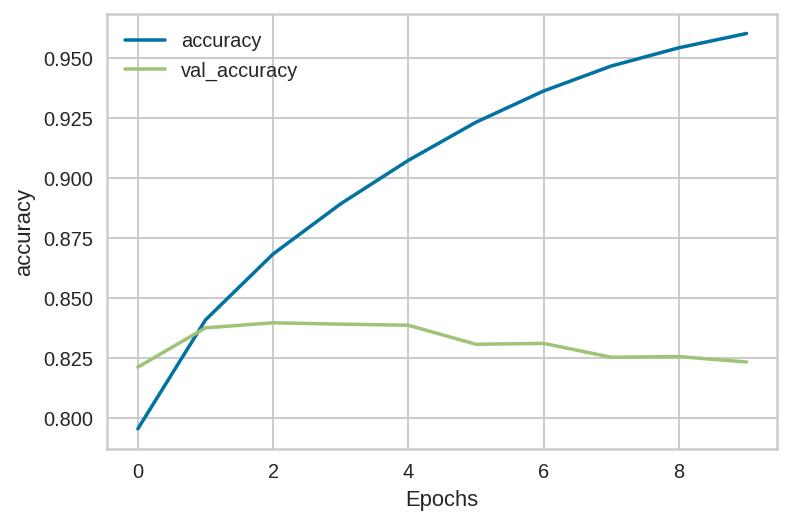

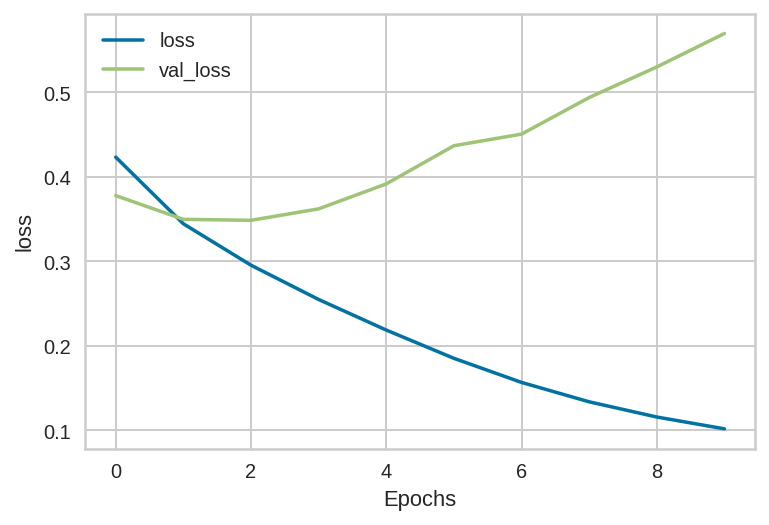

In [189]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [190]:
test_sequences = tokenizer.texts_to_sequences(X_test)
print(train_sequences[10])
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


[415, 1177, 14, 2, 575, 16933, 141, 113]


In [191]:
predictions_lstm = model.predict(test_padded)

In [192]:
print('Outputs shape')    
print(predictions_lstm.shape) # prints (n,1) but  need (n,)
predictions_lstm=np.transpose(predictions_lstm)[0]  # transformation to get (n,)
print(predictions_lstm.shape)  # now the shape is (n,)
# Applying transformation to get binary values predictions with 0.5 as thresold
predictions_lstm = list(map(lambda x: 0 if x<0.5 else 1, predictions_lstm))

Outputs shape
(210187, 1)
(210187,)


In [193]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

tn, fp, fn, tp = confusion_matrix(y_test, predictions_lstm).ravel()
print(f"TN: {tn}\nFP: {fp}\nFN: {fn}\nTP: {tp}")

precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1 = (2*precision*recall)/(precision+recall)
accuracy = (tp+tn)/(tp+tn+fp+fn)

pred_scores = np.concatenate(predictions, axis=0)[:,1]
auc = roc_auc_score(y_true = flat_true_labels, y_score = pred_scores)

print(f"Recall: {round(recall,3)}")
print(f"Precision: {round(precision,3)}")
print(f"F1: {round(f1,3)}")
print(f"Accuracy: {round(accuracy,3)}")
print(f"AUC: {round(auc,3)}")

TN: 95862
FP: 18642
FN: 18568
TP: 77115
Recall: 0.806
Precision: 0.805
F1: 0.806
Accuracy: 0.823
AUC: 0.962


# BERT (reference code : [this Colab NB](https://colab.research.google.com/drive/1pTuQhug6Dhl9XalKB0zUGf4FIdYFlpcX?usp=sharing) from Chris McCormick and Nick Ryan)

## Set global variables

In [12]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


In [13]:
#GLOBAL VARS
THESE_LABELS = "leanings"
NUM_LABELS = 2
EPOCHS = 2
MODEL = "distilbert-base-uncased"
LEARNING_RATE = 5e-5
BATCH_SIZE = 32

#Output file name
import datetime
now = datetime.datetime.now()
OUTPUT_FNAME = f"{now.year}-{now.month}-{now.day}_{now.hour}{now.minute}_{THESE_LABELS}_predictions.csv"
print("This will be the name of the output file: ", OUTPUT_FNAME)

# Create sentence and label lists
sentences = train.text.values
labels = train[THESE_LABELS].values

This will be the name of the output file:  2021-11-10_1532_leanings_predictions.csv


## Get tokenizer & tokenize training data

In [14]:
!pip install transformers sentencepiece


     |████████████████████████████████| 3.1 MB 5.8 MB/s 
     |████████████████████████████████| 1.2 MB 77.5 MB/s 
     |████████████████████████████████| 596 kB 75.8 MB/s 
     |████████████████████████████████| 895 kB 68.8 MB/s 
     |████████████████████████████████| 3.3 MB 60.9 MB/s 
     |████████████████████████████████| 59 kB 8.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [15]:
from transformers import DistilBertTokenizer,BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
if MODEL == "distilbert-base-uncased":

  from transformers import DistilBertTokenizer
  tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased', do_lower_case=True)

elif MODEL == "bert-base-uncased":

  from transformers import BertTokenizer
  tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

elif MODEL == "distilbert-base-cased":

  from transformers import DistilBertTokenizer
  tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-cased', do_lower_case=False)

else:
  raise ValueError('Unknown model specified. Check MODEL var.')

Loading BERT tokenizer...


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [16]:
# Print the original sentence.
print(' Original: ', sentences[15])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[15]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[15])))

 Original:  Julie's getting comments that are just GOLD. And she richly deserves them. ~SF https://twitter.com/JulieDiCaro/status/803316720823889921?lang=en Timeline Photos  
Tokenized:  ['julie', "'", 's', 'getting', 'comments', 'that', 'are', 'just', 'gold', '.', 'and', 'she', 'richly', 'deserves', 'them', '.', '~', 'sf', 'https', ':', '/', '/', 'twitter', '.', 'com', '/', 'julie', '##dic', '##aro', '/', 'status', '/', '80', '##33', '##16', '##7', '##20', '##8', '##23', '##8', '##8', '##9', '##9', '##21', '?', 'lang', '=', 'en', 'timeline', 'photos']
Token IDs:  [7628, 1005, 1055, 2893, 7928, 2008, 2024, 2074, 2751, 1012, 1998, 2016, 26502, 17210, 2068, 1012, 1066, 16420, 16770, 1024, 1013, 1013, 10474, 1012, 4012, 1013, 7628, 14808, 10464, 1013, 3570, 1013, 3770, 22394, 16048, 2581, 11387, 2620, 21926, 2620, 2620, 2683, 2683, 17465, 1029, 11374, 1027, 4372, 17060, 7760]


In [17]:
# originally code below finds a max lenghth of the sentences. Since it's large dataset, 
# I'll use 245 max length

# max_len = 0

# # For every sentence...
# for sent in sentences:

#     # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
#     input_ids = tokenizer.encode(sent, add_special_tokens=True, truncation = True) # ADDED max_length here

#     # Update the maximum sentence length.
#     max_len = max(max_len, len(input_ids))

# print('Max sentence length: ', max_len) 

max_len = 245

In [102]:
# Tokenize all of the sentences and map the tokens to their word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start. # a special classification token 
    #   (3) Append the `[SEP]` token to the end. # a special separator token
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = max_len,      # Pad & truncate all sentences.
                        truncation=True,
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[15])
print('Token IDs:', input_ids[15])

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2218: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Original:  Julie's getting comments that are just GOLD. And she richly deserves them. ~SF https://twitter.com/JulieDiCaro/status/803316720823889921?lang=en Timeline Photos  
Token IDs: tensor([  101,  7628,  1005,  1055,  2893,  7928,  2008,  2024,  2074,  2751,
         1012,  1998,  2016, 26502, 17210,  2068,  1012,  1066, 16420, 16770,
         1024,  1013,  1013, 10474,  1012,  4012,  1013,  7628, 14808, 10464,
         1013,  3570,  1013,  3770, 22394, 16048,  2581, 11387,  2620, 21926,
         2620,  2620,  2683,  2683, 17465,  1029, 11374,  1027,  4372, 17060,
         7760,   102,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,

In [18]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

NameError: ignored

In [104]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = BATCH_SIZE # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = BATCH_SIZE # Evaluate with this batch size.
        )

## Configure model

In [19]:
from transformers import AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top.
if MODEL == "distilbert-base-uncased":

  from transformers import DistilBertForSequenceClassification

  model = DistilBertForSequenceClassification.from_pretrained(
      "distilbert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
      num_labels = NUM_LABELS, # The number of output labels--2 for binary classification.
                      # You can increase this for multi-class tasks.   
      output_attentions = False, # Whether the model returns attentions weights.
      output_hidden_states = False, # Whether the model returns all hidden-states.
      return_dict=False,
  )

elif MODEL == "bert-base-uncased":

  from transformers import BertForSequenceClassification

  model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = NUM_LABELS, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
    return_dict=False,
)
  
elif MODEL == "distilbert-base-cased":

  from transformers import DistilBertForSequenceClassification

  model = DistilBertForSequenceClassification.from_pretrained(
      "distilbert-base-cased", # Use the 12-layer BERT model, with an uncased vocab.
      num_labels = NUM_LABELS, # The number of output labels--2 for binary classification.
                      # You can increase this for multi-class tasks.   
      output_attentions = False, # Whether the model returns attentions weights.
      output_hidden_states = False, # Whether the model returns all hidden-states.
      return_dict=False,
  )

else:
  raise ValueError('Unknown model specified. Check MODEL var.')

# Tell pytorch to run this model on the GPU.
model.cuda()

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.weight', 'classifi

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
       

In [106]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 5e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

## Training & validation

In [107]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
epochs = 2

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [108]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [109]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


In [110]:
import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        # It returns different numbers of parameters depending on what arguments
        # arge given and what flags are set. For our useage here, it returns
        # the loss (because we provided labels) and the "logits"--the model
        # outputs prior to activation.
        loss, logits = model(b_input_ids, 
                             attention_mask=b_input_mask, 
                             labels=b_labels)

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            # Get the "logits" output by the model. The "logits" are the output
            # values prior to applying an activation function like the softmax.
            (loss, logits) = model(b_input_ids, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 2 ========
Training...
  Batch    40  of  23,646.    Elapsed: 0:00:15.
  Batch    80  of  23,646.    Elapsed: 0:00:30.
  Batch   120  of  23,646.    Elapsed: 0:00:45.
  Batch   160  of  23,646.    Elapsed: 0:01:00.
  Batch   200  of  23,646.    Elapsed: 0:01:15.
  Batch   240  of  23,646.    Elapsed: 0:01:31.
  Batch   280  of  23,646.    Elapsed: 0:01:46.
  Batch   320  of  23,646.    Elapsed: 0:02:01.
  Batch   360  of  23,646.    Elapsed: 0:02:16.
  Batch   400  of  23,646.    Elapsed: 0:02:31.
  Batch   440  of  23,646.    Elapsed: 0:02:46.
  Batch   480  of  23,646.    Elapsed: 0:03:01.
  Batch   520  of  23,646.    Elapsed: 0:03:16.
  Batch   560  of  23,646.    Elapsed: 0:03:31.
  Batch   600  of  23,646.    Elapsed: 0:03:46.
  Batch   640  of  23,646.    Elapsed: 0:04:01.
  Batch   680  of  23,646.    Elapsed: 0:04:17.
  Batch   720  of  23,646.    Elapsed: 0:04:32.
  Batch   760  of  23,646.    Elapsed: 0:04:47.
  Batch   800  of  23,646.    Elapsed: 0:05:0

## Training results

In [112]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,0.33,0.27,0.88,2:28:36,0:05:21
2,0.20,0.27,0.89,2:28:55,0:05:21


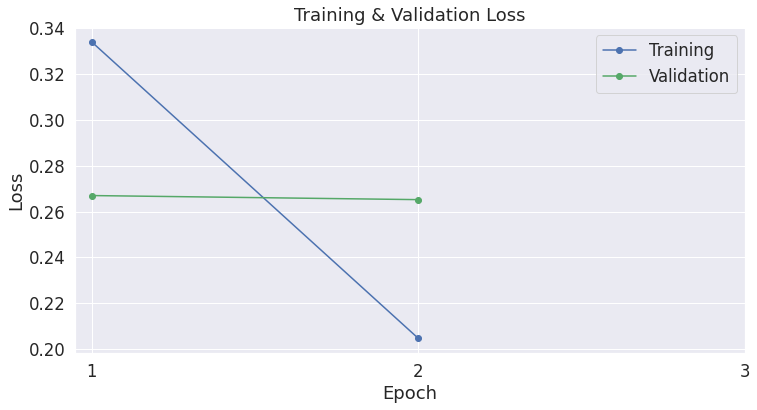

In [161]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3])

plt.show()

## Generate predictions on test set

In [21]:
import pandas as pd
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, TensorDataset

# Create sentence and label lists
sentences = test.text.values
labels = test[THESE_LABELS].values

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = max_len,           # Pad & truncate all sentences.
                        truncation = True,
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 32  

# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2218: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [25]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, attention_mask=b_input_mask)

  logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 210,187 test sentences...
    DONE.


## Get results

In [116]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [117]:
# Combine the results across all batches. 
flat_predictions = np.concatenate(predictions, axis=0)

# For each sample, pick the label (0 or 1) with the higher score.
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = np.concatenate(true_labels, axis=0)

tn, fp, fn, tp = confusion_matrix(flat_true_labels, flat_predictions).ravel()
print(f"TN: {tn}\nFP: {fp}\nFN: {fn}\nTP: {tp}")

precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1 = (2*precision*recall)/(precision+recall)
accuracy = (tp+tn)/(tp+tn+fp+fn)

pred_scores = np.concatenate(predictions, axis=0)[:,1]
auc = roc_auc_score(y_true = flat_true_labels, y_score = pred_scores)

print(f"Recall: {round(recall,3)}")
print(f"Precision: {round(precision,3)}")
print(f"F1: {round(f1,3)}")
print(f"Accuracy: {round(accuracy,3)}")
print(f"AUC: {round(auc,3)}")

TN: 104086
FP: 10418
FN: 12625
TP: 83058
Recall: 0.868
Precision: 0.889
F1: 0.878
Accuracy: 0.89
AUC: 0.962


## Save model

In [118]:
import os

# Saving best-practices: if you use defaults names for the model, you can reload it using from_pretrained()

output_dir = './results/'

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

# Save a trained model, configuration and tokenizer using `save_pretrained()`.
# They can then be reloaded using `from_pretrained()`
model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Good practice: save your training arguments together with the trained model
# torch.save(args, os.path.join(output_dir, 'training_args.bin'))

Saving model to ./results/


('./results/tokenizer_config.json',
 './results/special_tokens_map.json',
 './results/vocab.txt',
 './results/added_tokens.json')

### load model & export results (for later prediction)


In [23]:

output_dir = './results/'

# Load a trained model and vocabulary that you have fine-tuned
model = model.from_pretrained(output_dir)
tokenizer = tokenizer.from_pretrained(output_dir)

# Copy the model to the GPU.
model.to(device)

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
       

In [30]:
# Combine the results across all batches. 
flat_predictions = np.concatenate(predictions, axis=0)

# For each sample, pick the label (0 or 1) with the higher score.
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = np.concatenate(true_labels, axis=0)


In [27]:
OUTPUT_FNAME

'2021-11-10_1532_leanings_predictions.csv'

In [31]:
test_results = test.copy()
test_results.rename(columns={'leanings':"true_label"},inplace=True)
test_results["predicted_label"] = flat_predictions
test_results["raw_score_0"] = np.concatenate(predictions, axis=0)[:,0]
test_results["raw_score_1"] = np.concatenate(predictions, axis=0)[:,1]

In [32]:
test_results.to_csv("results/"+OUTPUT_FNAME)

### Manual check (for word count etc)

In [49]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_sm")

tokenizer = Tokenizer(nlp.vocab)

In [69]:
from collections import Counter

def word_count(docs):
    """ 토큰화된 문서들을 입력받아 토큰을 카운트 하고 관련된 속성을 가진 데이터프레임을 리턴합니다.
    Args:
        docs (series or list): 토큰화된 문서가 들어있는 list
    Returns:
        list: Dataframe
    """
    # 전체 코퍼스에서 단어 빈도 카운트
    word_counts = Counter()

    # 단어가 존재하는 문서의 빈도 카운트, 단어가 한 번 이상 존재하면 +1
    word_in_docs = Counter()

    # 전체 문서의 갯수
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        word_in_docs.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    # 단어의 순위
    # method='first': 같은 값의 경우 먼저나온 요소를 우선
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # 코퍼스 내 단어의 비율
    wc['percent'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')

    # 누적 비율
    # cumsum() : cumulative sum
    wc['cul_percent'] = wc['percent'].cumsum()

    temp2 = zip(word_in_docs.keys(), word_in_docs.values())
    ac = pd.DataFrame(temp2, columns=['word', 'word_in_docs'])
    wc = ac.merge(wc, on='word')
    
    # 전체 문서 중 존재하는 비율
    wc['word_in_docs_percent'] = wc['word_in_docs'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [90]:
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)

    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [81]:
test_results['lemmas'] = test_results['text'].apply(get_lemmas)
test_results['lemmas'].head()


In [91]:
test_results_agree_dem = test_results[(test_results['true_label'] == 0) & (test_results['predicted_label'] == 0)]

In [92]:
test_results_agree_dem_np = test_results[(test_results['true_label'] == 0) & (test_results['predicted_label'] == 1)]

In [93]:
test_results_agree_rep = test_results[(test_results['true_label'] == 1) & (test_results['predicted_label'] == 1)]

In [94]:
test_results_agree_rep_np = test_results[(test_results['true_label'] == 1) & (test_results['predicted_label'] == 0)]

In [95]:
test_results_agree_rep.sample(3)

,text,true_label,predicted_label,raw_score_0,raw_score_1,lemmas,stem
9914104,https://www.lifezette.com/2020/01/planned-pare...,1,1,-3.057073,2.565078,[https://www.lifezette.com/2020/01/planned-par...,http www lifezett com 2020 01 plan parenthood ...
8854063,Birds of a feather. Pickaxe vandal to be baile...,1,1,-4.946160,4.190774,"[bird, feather, pickaxe, vandal, bail, guy, de...",bird feather pickax vandal bail guy demolish t...
6453182,"7,000 pounds / 3 1/2 tons of ammo delivered in...",1,1,-3.535342,2.995966,"[7,000, pound, 3, 1/2, ton, ammo, deliver, 2, ...",7 000 pound 3 1 2 ton ammo deliv 2 day suppos ...


In [96]:
wc_dem = word_count(test_results_agree_dem['lemmas'])
wc_dem_top100 = wc_dem[wc_dem['rank'] <= 100]



In [73]:
!pip install squarify


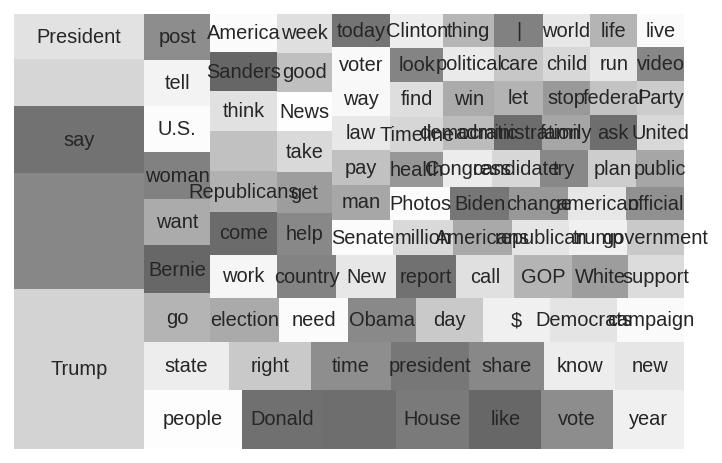

In [97]:
import squarify
import matplotlib.pyplot as plt

squarify.plot(sizes=wc_dem_top100['percent'], label=wc_dem_top100['word'], alpha=0.6 )
plt.axis('off')
plt.show()

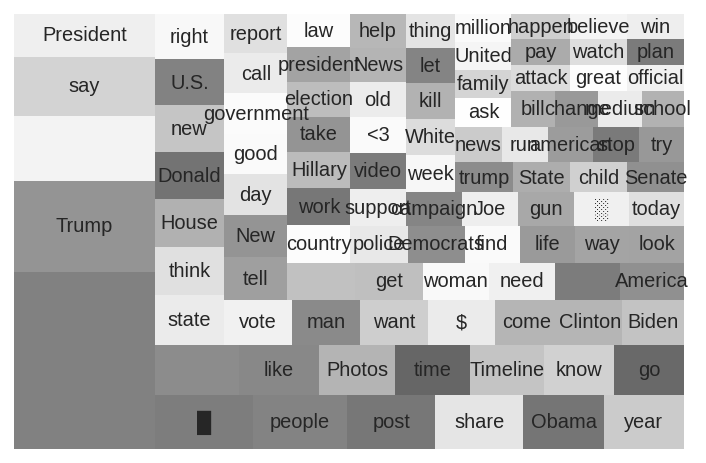

In [98]:
wc_dem_not = word_count(test_results_agree_dem_np['lemmas'])
wc_dem_not_top100 = wc_dem_not[wc_dem_not['rank'] <= 100]


squarify.plot(sizes=wc_dem_not_top100['percent'], label=wc_dem_not_top100['word'], alpha=0.6 )
plt.axis('off')
plt.show()

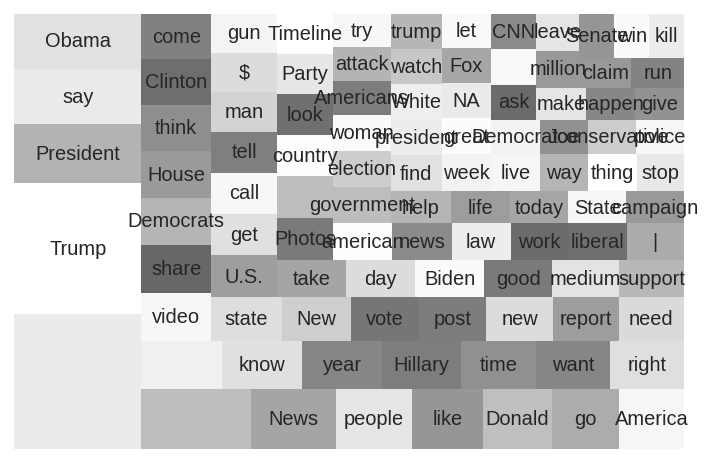

In [99]:
wc_rep = word_count(test_results_agree_rep['lemmas'])
wc_rep_top100 = wc_rep[wc_rep['rank'] <= 100]


squarify.plot(sizes=wc_rep_top100['percent'], label=wc_rep_top100['word'], alpha=0.6 )
plt.axis('off')
plt.show()

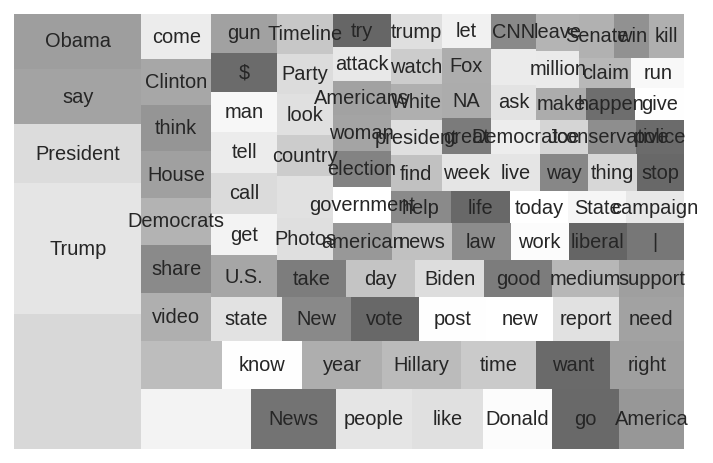

In [100]:
wc_rep_np = word_count(test_results_agree_rep_np['lemmas'])
wc_rep_np_top100 = wc_rep[wc_rep['rank'] <= 100]


squarify.plot(sizes=wc_rep_np_top100['percent'], label=wc_rep_np_top100['word'], alpha=0.6 )
plt.axis('off')
plt.show()

#   Conclusion

*   Chance level = 0.5 (balanced dataset)
*   BERT (distilbert): Recall: 0.868, Precision: 0.889, F1: 0.878, Accuracy: 0.89, 

*   LSTM : Recall: 0.806, Precision: 0.805, F1: 0.806, Accuracy: 0.823


5.   Limitation, Future Goal


*   10% of total data, truncated sentence longer than 245 tokens -> more data use will improve?
*   didn't finish up other machine learning models to compare -> take too long 
*   binary classification -> gray area, sharing across parties, non-political posts such as entertainment
*   human validation at least with small sample







# ML comparison (not finished)

In [33]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk import pos_tag
import re
from sklearn.feature_extraction.text import CountVectorizer as CV
from sklearn.metrics import roc_auc_score

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import plotly.express as px
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from yellowbrick.classifier import ClassificationReport
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC

import joblib 


mpl.rcParams["figure.dpi"] = 300
%matplotlib inline
%config InlineBackend.figure_format ='retina'

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [34]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [35]:

import numpy as np
from sklearn.feature_extraction.text import CountVectorizer as CV
import string
import pandas as pd
from collections import OrderedDict
import csv

exclude = set(string.punctuation)
stopwords_nltk_en = set(stopwords.words('english'))
stopwords_nltk_en_plus_punctuation = set.union(exclude, stopwords_nltk_en)

In [36]:
def porter_stemming(text, stem=True):
    """ Tokenize text and stem words removing punctuation """
#    text = text.translate(None, string.punctuation)
    tokens = nltk.word_tokenize(text)
 
    if stem:
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(t) for t in tokens]
 
    return tokens

def stem_sanitize(text):
#    text = re.sub(r'[string.punctuation]', ' ', text)
    text = re.sub(r'[^\w\s]',' ', text)
    text = text.lower()

    return ' '.join([word for word in porter_stemming(text)
                    if word not in stopwords_nltk_en])

# def basic_sanitize(text):
#     text = re.sub(r'[^\w\s]',' ', text)
#     text = text.lower()

#     return ' '.join(word for word in text)

In [37]:

# X_train_merge = train_merge.text.values
# y_train_merge = train_merge.leanings.values

# X_test = test.text.values
# y_test = test.leanings.values

# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(train.shape[0]))
print('Number of testing sentences: {:,}\n'.format(test.shape[0]))


Number of training sentences: 840,744

Number of testing sentences: 210,187



In [38]:
train_ml = train.copy()

In [39]:
test_ml = test.copy()

In [40]:
train_ml.sample(3)

,text,leanings
5052223,The other reason is the long track record of f...,1
3920821,"Bingo! We Survived Bush, We Will Survive Trump...",0
5444136,"NYT: Bannon, Trump trying to take on the Pope...",1


In [41]:
train_ml['stemmed'] = [stem_sanitize(l) for l in train.text.values] # 20 minutes 


In [42]:
test_ml['stemmed'] = [stem_sanitize(l) for l in test.text.values] # 5 min


In [47]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

models = {
    "XGB": (
        Pipeline([
            ('vect', CountVectorizer()),
            ('tfidf', TfidfTransformer()),
            ('clf', XGBClassifier(objective="binary:logistic"))]
        ),
        {
            "clf__gamma": [i / 10.0 for i in range(1, 5)],
            "clf__reg_alpha": [1e-5, 0.1, 1],
            "clf__learning_rate": [0.01, 0.05, 0.1],
            "clf__min_child_weight": [i for i in range(2, 5)],
            "clf__max_depth": [10, 15, 20]
        },
    ),
    "RF": (
        Pipeline([
            ('vect', CountVectorizer()),
            ('tfidf', TfidfTransformer()),
            ('clf', RandomForestClassifier())]
        ),
        {
            "clf__n_estimators": [1, 10, 100, 1000,],
            "clf__max_depth": [1, 10, 50, 100],
            "clf__min_samples_split": [2, 10, 30, 50],
            "clf__min_samples_leaf": [1, 5, 10],
        },
    ),
    "ExtraTrees": (
        Pipeline([
            ('vect', CountVectorizer()),
            ('tfidf', TfidfTransformer()),
            ('clf', ExtraTreesClassifier())]
        ),
        {
            "clf__n_estimators": [10, 100, 1000, 5000],
            "clf__max_depth": [1, 10, 30, 50, 100],
            "clf__min_samples_split": [2, 10, 30, 50, 100],
            "clf__min_samples_leaf": [1, 3, 5, 10],
        },
    ),
    "LogReg": (
        Pipeline([
            ('vect', CountVectorizer()),
            ('tfidf', TfidfTransformer()),
            ('clf', LogisticRegression())]
        ),
        {
            "clf__penalty": ["l2"],
            "clf__C": np.logspace(1, 5, 10),
            "clf__solver": ["liblinear", "newton-cg", "sag", "saga", "lbfgs"],
            "clf__max_iter": [100, 500, 1000, 1500],
        },
    )
}

In [48]:
for name, (model, parameters) in models.items():
    print("----- {} -----".format(name))

    gs = GridSearchCV(
        model,
        parameters,
        cv=3, # too slow for 5 cv
        n_jobs=-1,
        scoring="roc_auc",
        verbose=1,
        return_train_score=True,
    )

    gs.fit(train_ml.stemmed, train_ml.leanings)
    print("Best Parameters:", gs.best_params_)
    print("")
    print("Best Score:", gs.best_score_)

    joblib.dump(gs.best_estimator_, f"{name}.pkl", compress=1)
    joblib.dump(gs.cv_results_, f"{name}_results.pkl", compress=1)

    y_pred = gs.predict(test_ml.stemmed)
    print(y_pred)

    print("")
    print("Precision Score :", precision_score(test.leanings, y_pred))
    print("Recall Score:", recall_score(test.leanings, y_pred))
    print("f1 Score:", f1_score(test.leanings, y_pred))
    print("")

----- RF -----
Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 27.1min


KeyboardInterrupt: ignored

In [ ]:
XGB = joblib.load("XGB.pkl")
print(XGB)

pred = XGB.predict(test_ml.stemmed)

tn, fp, fn, tp = confusion_matrix(test.leanings.values, pred).ravel()
print(f"TN: {tn}\nFP: {fp}\nFN: {fn}\nTP: {tp}")
print("\n")

precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1 = (2*precision*recall)/(precision+recall)
accuracy = (tp+tn)/(tp+tn+fp+fn)
print(f"Recall: {round(recall,3)}")
print(f"Precision: {round(precision,3)}")
print(f"F1: {round(f1,3)}")
print(f"Accuracy: {round(accuracy,3)}")

auc = roc_auc_score(y_true = test.leanings.values, y_score = pred) # using scores only for positive class, regardless of label with higher score
print(f"AUC: {round(auc,3)}")

In [ ]:
RF = joblib.load("RF.pkl")
pred = RF.predict(test_ml.stemmed)

tn, fp, fn, tp = confusion_matrix(test.leanings.values, pred).ravel()
print(f"TN: {tn}\nFP: {fp}\nFN: {fn}\nTP: {tp}")
print("\n")

precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1 = (2*precision*recall)/(precision+recall)
accuracy = (tp+tn)/(tp+tn+fp+fn)
print(f"Recall: {round(recall,3)}")
print(f"Precision: {round(precision,3)}")
print(f"F1: {round(f1,3)}")
print(f"Accuracy: {round(accuracy,3)}")

auc = roc_auc_score(y_true = test.leanings.values, y_score = pred) # using scores only for positive class, regardless of label with higher score
print(f"AUC: {round(auc,3)}")

In [ ]:
ExtraTrees = joblib.load("ExtraTrees.pkl")
print(RF)

pred = ExtraTrees.predict(test_ml.stemmed)

tn, fp, fn, tp = confusion_matrix(test.leanings.values, pred).ravel()
print(f"TN: {tn}\nFP: {fp}\nFN: {fn}\nTP: {tp}")
print("\n")

precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1 = (2*precision*recall)/(precision+recall)
accuracy = (tp+tn)/(tp+tn+fp+fn)
print(f"Recall: {round(recall,3)}")
print(f"Precision: {round(precision,3)}")
print(f"F1: {round(f1,3)}")
print(f"Accuracy: {round(accuracy,3)}")

auc = roc_auc_score(y_true = test.leanings.values, y_score = pred) # using scores only for positive class, regardless of label with higher score
print(f"AUC: {round(auc,3)}")

In [ ]:
LogReg = joblib.load("LogReg.pkl")
print(RF)

pred = LogReg.predict(test_ml.stemmed)

tn, fp, fn, tp = confusion_matrix(test.leanings.values, pred).ravel()
print(f"TN: {tn}\nFP: {fp}\nFN: {fn}\nTP: {tp}")
print("\n")

precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1 = (2*precision*recall)/(precision+recall)
accuracy = (tp+tn)/(tp+tn+fp+fn)
print(f"Recall: {round(recall,3)}")
print(f"Precision: {round(precision,3)}")
print(f"F1: {round(f1,3)}")
print(f"Accuracy: {round(accuracy,3)}")

auc = roc_auc_score(y_true = test.leanings.values, y_score = pred) # using scores only for positive class, regardless of label with higher score
print(f"AUC: {round(auc,3)}")